In [1]:
import pandas as pd
import datetime as dt
from matplotlib import pyplot as plt
import matplotlib

In [2]:
df = pd.read_csv("owid-covid-data.csv")
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


In [3]:
df.isnull().sum()

iso_code                                        0
continent                                   11932
location                                        0
date                                            0
total_cases                                  8373
                                            ...  
human_development_index                     41066
excess_mortality_cumulative_absolute       199365
excess_mortality_cumulative                199365
excess_mortality                           199347
excess_mortality_cumulative_per_million    199365
Length: 67, dtype: int64

In [4]:
df.dtypes

iso_code                                    object
continent                                   object
location                                    object
date                                        object
total_cases                                float64
                                            ...   
human_development_index                    float64
excess_mortality_cumulative_absolute       float64
excess_mortality_cumulative                float64
excess_mortality                           float64
excess_mortality_cumulative_per_million    float64
Length: 67, dtype: object

In [5]:
df.shape

(206386, 67)

In [6]:
#dateFormat = '%Y-%m-%d'
# Convert string values of date to datetime format
df['date'] = [dt.datetime.strptime(x,'%Y-%m-%d') for x in df['date']] 
#print(CVD.dtypes)

In [7]:
#Let's look at multiple countries
countries=['United States', 'Malaysia', 'France']
df_country = df[df.location.isin(countries)]  #Create subset data frame for select countries

In [8]:
df_country.set_index('date', inplace=True)  #Make date the index for easy plotting

In [9]:
#To calculate mortality rate
df_country['mortality_rate'] = df_country['total_deaths']/df_country['total_cases']
#print(df_country.tail())

C:\Users\USER\AppData\Local\Temp\ipykernel_10684\3862235155.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_country['mortality_rate'] = df_country['total_deaths']/df_country['total_cases']


Text(0.5, 1.0, 'Total Deaths')

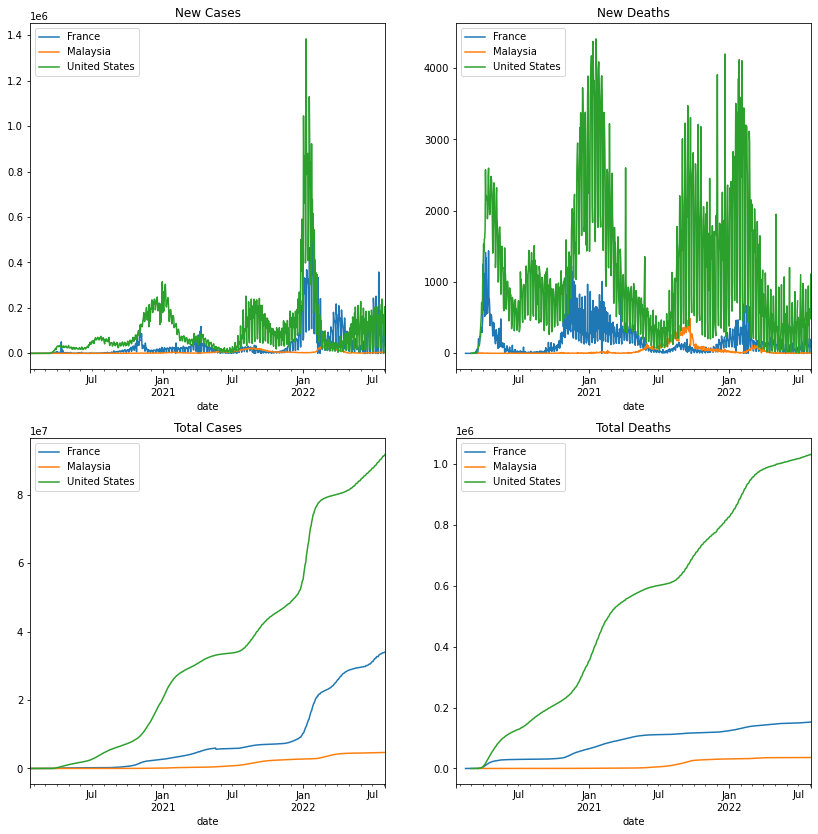

In [10]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14,14))

df_country.groupby('location')['new_cases'].plot(ax=axes[0,0], legend=True) #for log scale add logy=True
df_country.groupby('location')['new_deaths'].plot(ax=axes[0,1], legend=True)
df_country.groupby('location')['total_cases'].plot(ax=axes[1,0], legend=True)
df_country.groupby('location')['total_deaths'].plot(ax=axes[1,1], legend=True)
#CVD_country.groupby('location')['mortality_rate'].plot(ax=axes[1,1], legend=True)

axes[0, 0].set_title("New Cases")
axes[0, 1].set_title("New Deaths")
axes[1, 0].set_title("Total Cases")
axes[1, 1].set_title("Total Deaths")


In [11]:
fig.tight_layout()  # adjust subplot parameters to give specified padding.